##### Bibliothèques

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('C:/Users/user/OneDrive/Documents/M2 SNS IDS/HAH913E - Santé activité physique 5/GitHub/HAH913E-2024-ECG_001/ECGu.txt')

##### Paramètres de l'ECG

In [4]:
Fs = 1024  # Sampling frequency / Fréquence d'échantillonnage en Hz / f = 1/T
gain = 520  # A/D converter gain en 520 µV per unit 

In [5]:
time = np.arange(0, len(data) / Fs, 1 / Fs) # l'axe temporel

In [6]:
ecg_signal = data * gain

###  Tracé

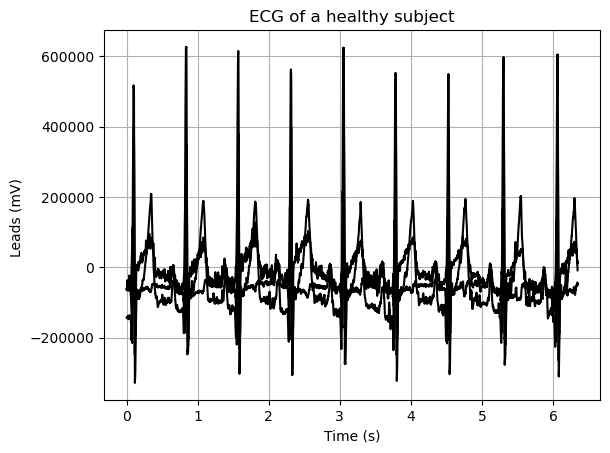

In [37]:
# All leads : I, II, III in the same graph
plt.plot(time, ecg_signal, color='black')
plt.title('ECG of a healthy subject')
plt.xlabel('Time (s)')
plt.ylabel('Leads (mV) ')
plt.grid(True) # grille
plt.show() # affichage du graphe

In [8]:
ecg_lead1 = data[:, 0] * gain  # Lead I
ecg_lead2 = data[:, 1] * gain  # Lead II
ecg_lead3 = data[:, 2] * gain  # Lead III

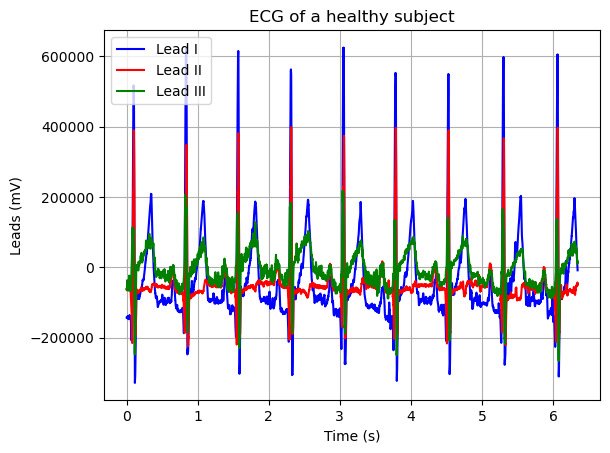

In [39]:
# Trace Lead I
plt.plot(time, ecg_lead1, label='Lead I', color='blue')

# Lead II
plt.plot(time, ecg_lead2, label='Lead II', color='red')

# Lead III
plt.plot(time, ecg_lead3, label='Lead III', color='green')

# le graphe
plt.title('ECG of a healthy subject')
plt.xlabel('Time (s)')
plt.ylabel('Leads (mV)')
plt.grid(True) # grille


plt.legend()
plt.show() # affichage du graphe

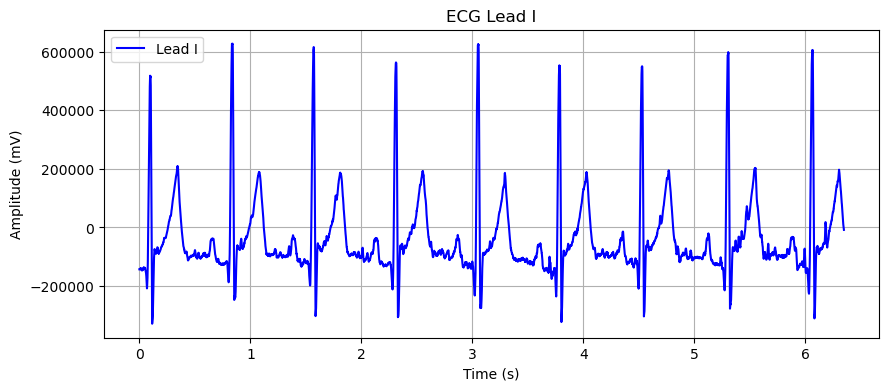

In [40]:
# Lead I
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead1, label='Lead I', color='blue')
plt.title('ECG Lead I')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)  # Afficher la grille
plt.legend()
plt.show()  # Afficher le graphique pour Lead I

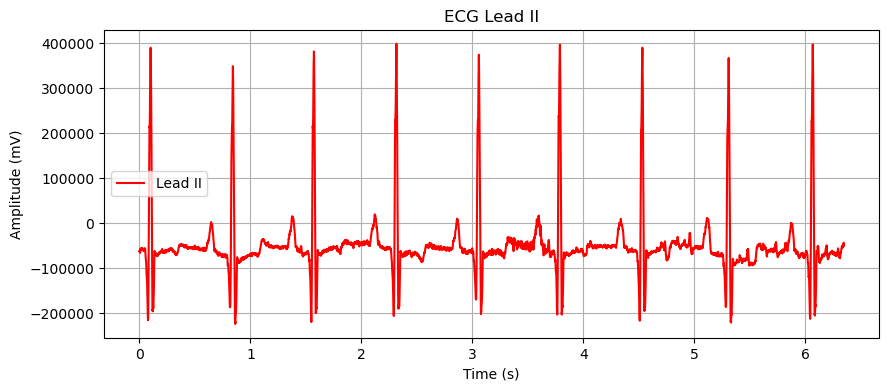

In [35]:
# Lead II
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead2, label='Lead II', color='red')
plt.title('ECG Lead II')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()
plt.show()  # Afficher le graphique pour Lead II

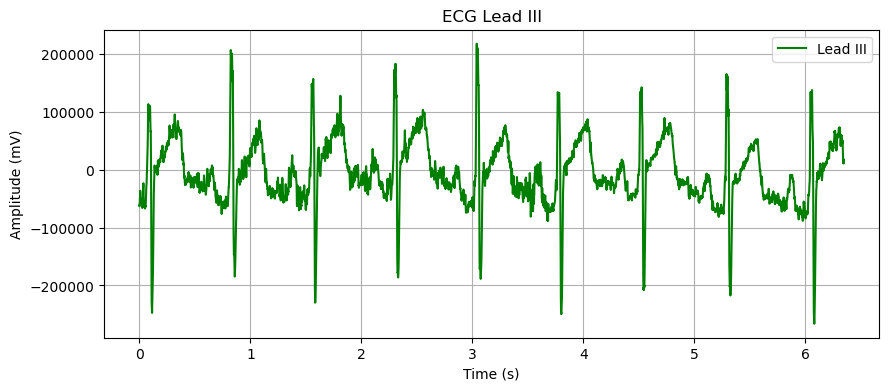

In [36]:
# Lead III
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead3, label='Lead III', color='green')
plt.title('ECG Lead III')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()
plt.show()  # Afficher le graphique pour Lead III

#### low pass filter

In [17]:
from scipy.signal import butter, filtfilt

In [18]:
# Fonction simple pour appliquer un filtre passe-bas
def low_pass_filter(data, cutoff, fs, order=2):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)  # Filtre les données

In [19]:
# Paramètres du filtre
cutoff = 30  # Fréquence de coupure (30 Hz)
fs = 1024  # Fréquence d'échantillonnage (1024 Hz)

In [20]:
# Appliquer le filtre à chaque lead
ecg_lead1_filtered = low_pass_filter(ecg_lead1, cutoff, fs)
ecg_lead2_filtered = low_pass_filter(ecg_lead2, cutoff, fs)
ecg_lead3_filtered = low_pass_filter(ecg_lead3, cutoff, fs)


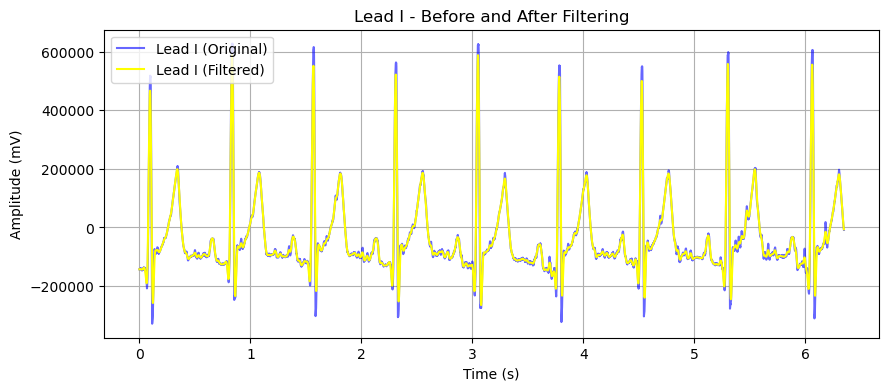

In [26]:
# Afficher Lead I, brut et filtré
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead1, label='Lead I (Original)', color='blue', alpha=0.6)
plt.plot(time, ecg_lead1_filtered, label='Lead I (Filtered)', color='yellow')
plt.title('Lead I - Before and After Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()
plt.show()

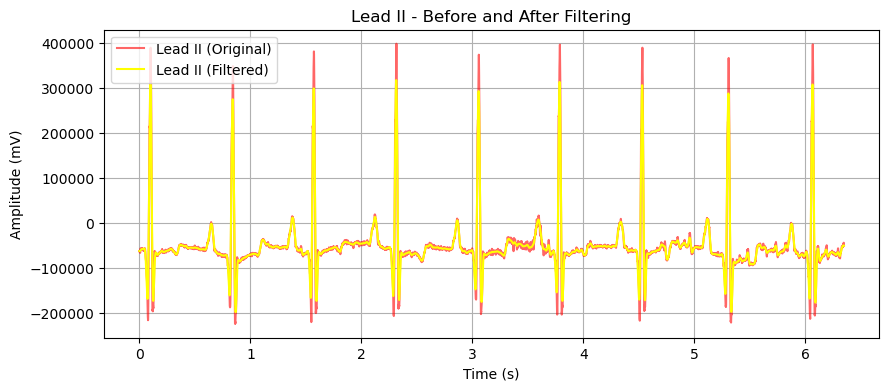

In [28]:
# Afficher Lead II, brut et filtré
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead2, label='Lead II (Original)', color='red', alpha=0.6)
plt.plot(time, ecg_lead2_filtered, label='Lead II (Filtered)', color='yellow')
plt.title('Lead II - Before and After Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()
plt.show()

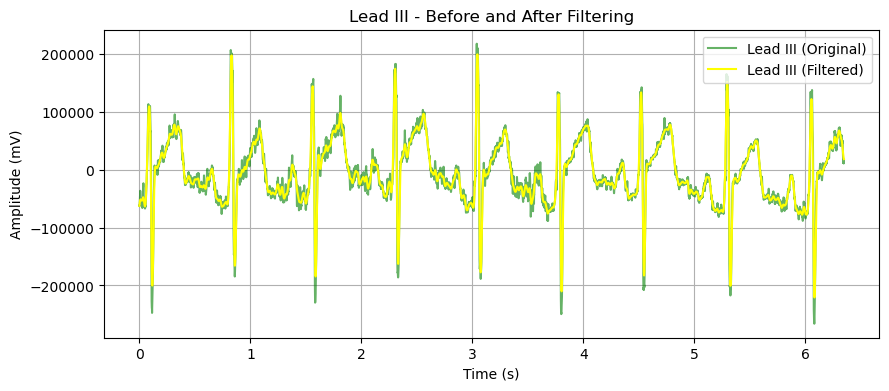

In [29]:
# Afficher Lead III, brut et filtré
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_lead3, label='Lead III (Original)', color='green', alpha=0.6)
plt.plot(time, ecg_lead3_filtered, label='Lead III (Filtered)', color='yellow')
plt.title('Lead III - Before and After Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.grid(True)
plt.legend()
plt.show()